In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files dare available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
local_dir = "../input/"

import os
# print(os.listdir(local_dir))

import glob
csv_file = glob.glob(local_dir+'*.csv')
print (csv_file)
# Any results you write to the current directory are saved as output.

['../input/periods_train.csv', '../input/periods_test.csv', '../input/train_active.csv', '../input/test.csv', '../input/test_active.csv', '../input/train.csv']


### Data description

train.csv - Train data.
item_id - Ad id.
user_id - User id.
region - Ad region.
city - Ad city.
parent_category_name - Top level ad category as classified by Avito's ad model.
category_name - Fine grain ad category as classified by Avito's ad model.
param_1 - Optional parameter from Avito's ad model.
param_2 - Optional parameter from Avito's ad model.
param_3 - Optional parameter from Avito's ad model.
title - Ad title.
description - Ad description.
price - Ad price.
item_seq_number - Ad sequential number for user.
activation_date- Date ad was placed.
user_type - User type.
image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.
image_top_1 - Avito's classification code for the image.
deal_probability - The target variable. This is the likelihood that an ad actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one.

__notice__:
    
    1. interpretation of param_1, _2, and _3?

    2. price should be categorized with parent_category!
    
    3. data_placed: mind the weekday or weekends of post data affect the dp!
    
    4. what is the user_type?
    
    5. 

### Data Exploration

combine the training and testing data into list to do manipulation the same time
** discription data**
full_des = [train_active, test_active]

target column is the deal_probability 





In [2]:
train_dp = pd.read_csv(local_dir+'train.csv', parse_dates=["activation_date"])
test_dp= pd.read_csv(local_dir+'test.csv', parse_dates=["activation_date"])
full_dp = [train_dp,test_dp]

In [3]:
train_dp.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


# print description info

In [4]:
# print percentage of NA value in each column
print ('Training Data')
train_summary = pd.DataFrame({'DataType': train_dp.dtypes,
                              'Non_Na':train_dp.notnull().sum(),
                              '% NULL':train_dp.isnull().mean(),
                              'Unique_values': train_dp.apply(lambda x: len(x.unique()))
                             })  

print (train_summary)
print ('*'*30)
print ('Testing Data')
test_summary = pd.DataFrame({'DataType': test_dp.dtypes,
                             'Not_Na':test_dp.notnull().sum(),
                              '%NULL':test_dp.isnull().mean(),
                              'Unique_values': test_dp.apply(lambda x: len(x.unique()))
                             })  
print (test_summary)

Training Data
                        % NULL        DataType   Non_Na  Unique_values
item_id               0.000000          object  1503424        1503424
user_id               0.000000          object  1503424         771769
region                0.000000          object  1503424             28
city                  0.000000          object  1503424           1733
parent_category_name  0.000000          object  1503424              9
category_name         0.000000          object  1503424             47
param_1               0.040957          object  1441848            372
param_2               0.435368          object   848882            272
param_3               0.573734          object   640859           1220
title                 0.000000          object  1503424         788377
description           0.077341          object  1387148        1317103
price                 0.056778         float64  1418062          17007
item_seq_number       0.000000           int64  1503424        

## Deal Probability

__defination__: The target variable. This is the likelihood that an ad actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one.


/home/zehai/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


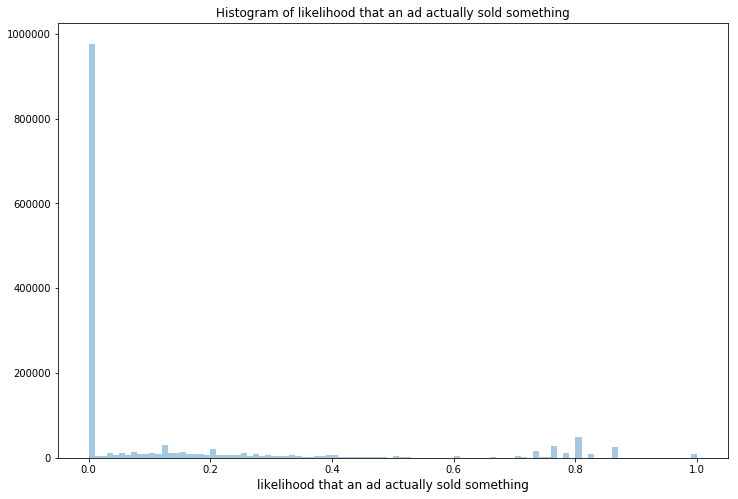

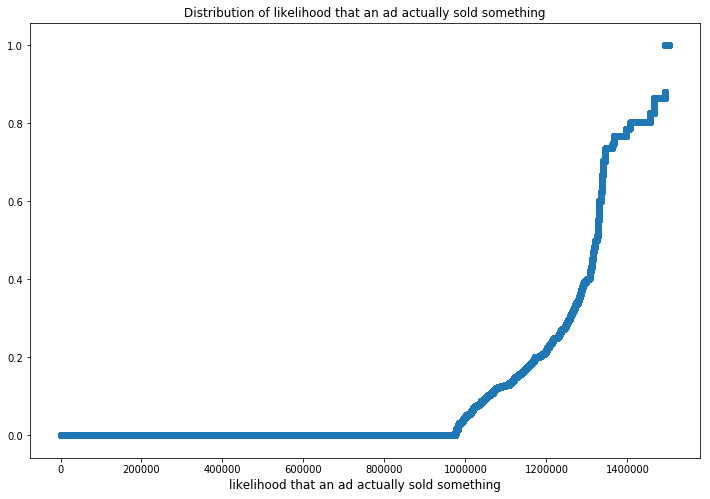

In [5]:
plt.figure(figsize=(12,8))

sns.distplot(train_dp['deal_probability'], bins =100, kde = False)
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Histogram of likelihood that an ad actually sold something")
plt.show() 
plt.figure(figsize = (12, 8))
plt.scatter(range(train_dp.shape[0]), np.sort(train_dp.deal_probability.values))
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Distribution of likelihood that an ad actually sold something")
plt.show()

## It is interesting to view if there is full overlapping of training and testing data

Here we can see, as expected "region", "parent_cate", "cate",

In [6]:
train_summary.index

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

In [7]:
joint_df = train_dp.append(test_dp)[test_dp.columns.tolist()]
joint_summary = pd.DataFrame({
                              'Unique_values': joint_df.apply(lambda x: len(x.unique()))
                             }) 
joint_summary['OverLapping_Data'] = train_summary['Unique_values']+test_summary['Unique_values']-joint_summary['Unique_values']
joint_summary['%_in_trainning']= joint_summary['OverLapping_Data']/train_summary['Unique_values']*100
joint_summary['%_in_test']= joint_summary['OverLapping_Data']/test_summary['Unique_values']*100
joint_summary.round(2)


,Unique_values,OverLapping_Data,%_in_trainning,%_in_test
item_id,2011862,0.0,0.00,0.00
user_id,1009909,67929.0,8.80,22.19
region,28,28.0,100.00,100.00
city,1752,1625.0,93.77,98.84
parent_category_name,9,9.0,100.00,100.00
category_name,47,47.0,100.00,100.00
param_1,372,362.0,97.31,100.00
param_2,278,250.0,91.91,97.66
param_3,1277,917.0,75.16,94.15
title,1022203,64213.0,8.14,21.55


In [8]:
train_user_id = train_dp['user_id'].tolist()
test_user_id = test_dp['user_id'].tolist()
shared_id = np.intersect1d(train_user_id,test_user_id)

### No overlapping of items but same users in training and testing group
### Cities not overlapping in training and test data
### Posted data are data from one month|

## Observations

   ### Catagorical Features

    suitable catagorical features are:
                       
                           1. __region__,
                           2. __parent_category_name__,
                           3. __category_name__
                           4. __user_type__
   
  

### Overlapping Image
The over lapping data is Na

### 1 Region data

The translation data comes from [sban's kernel](https://www.kaggle.com/shivamb/in-depth-analysis-visualisations-avito/code)

In [9]:
# @hidden_cell
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

In [10]:
# map translation to the trainning data\
for df in full_dp:
    df['region_en'] = df['region'].apply(lambda x : region_map[x])
    df['parent_category_name_en'] = df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
    df['category_name_en'] = df['category_name'].apply(lambda x : category_map[x])

In [11]:
# snap_shot of the training data
train_dp.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Volgograd oblast,Transport,Cars


In [12]:
print(train_dp.image[100])

2707593481ee0d272038e87763ca30bbea7f48939e45ab19571d9784e38ea52a


### The major challenge for this dataset is to make sence of Russian vocabulary

- Either get translation API to translated in to English
- Deal with synnonymous in Russian database

In [13]:
# how many category_name does test and train data possess
cata_group = train_dp[['item_id','parent_category_name_en']].groupby('parent_category_name_en')
cata_group.count()

,item_id
parent_category_name_en,
Animals,52470
Consumer electronics,173008
For business,18075
For the home and garden,178823
Hobbies & leisure,86011
Personal belongings,697623
Real estate,153190
Services,64385
Transport,79839


In [14]:
# how many category_name does test and train data possess
cata_group = test_dp[['item_id','parent_category_name_en']].groupby('parent_category_name_en')
cata_group.count()

,item_id
parent_category_name_en,
Animals,19976
Consumer electronics,58282
For business,6463
For the home and garden,64910
Hobbies & leisure,31271
Personal belongings,216577
Real estate,57387
Services,23619
Transport,29953


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

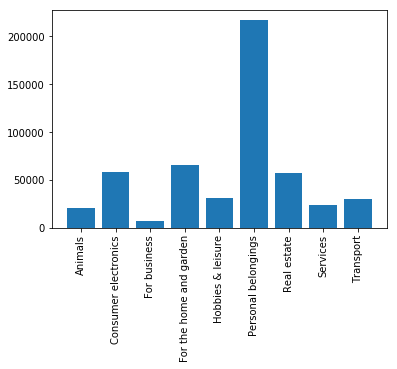

In [15]:
g = plt.bar(cata_group.count().index,cata_group.count().item_id)
plt.xticks(rotation=90)

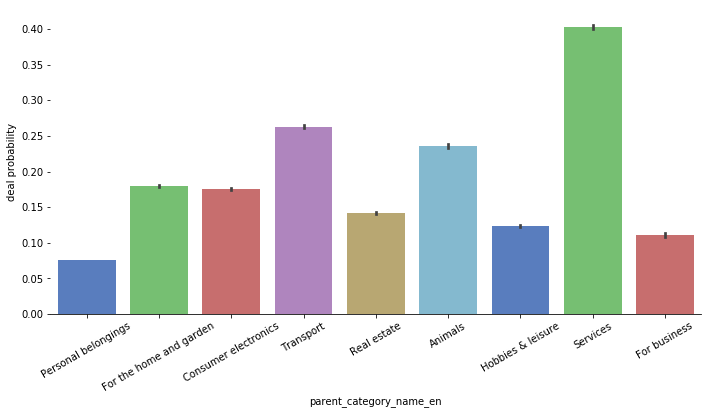

In [16]:
g = sns.factorplot(x="parent_category_name_en",y="deal_probability",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("deal probability")

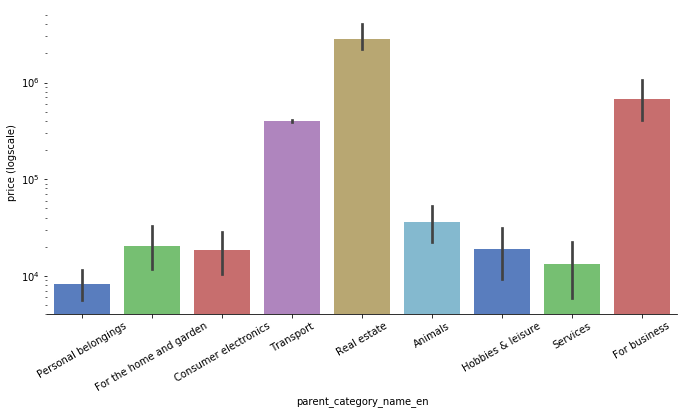

In [17]:
g = sns.factorplot(x="parent_category_name_en",y="price",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted")
g.despine(left=True)
g.fig.get_axes()[0].set_yscale('log')
g.set_xticklabels(rotation=30)
g = g.set_ylabels("price (logscale)")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

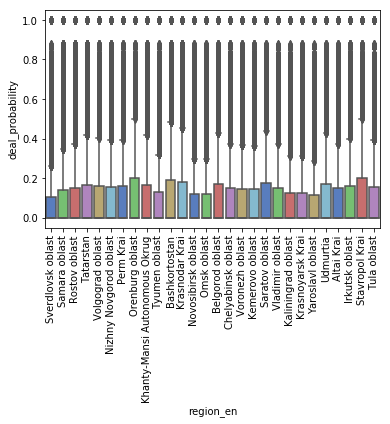

In [18]:
g = sns.boxplot(x="region_en",y="deal_probability",data=train_dp,palette = "muted")
plt.xticks(rotation='vertical')

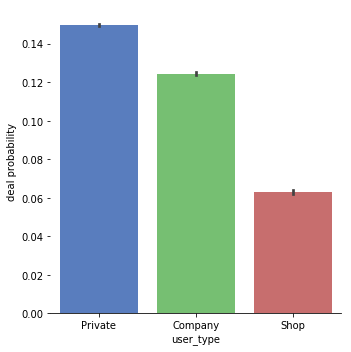

In [19]:
g = sns.factorplot(x="user_type",y="deal_probability",data=train_dp,kind="bar", size = 5, aspect=1,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("deal probability")

In [20]:
# # date time features
# for data in full_dp:
#     data['weekday'] = data.activation_date.dt.weekday
#     data['month'] = data.activation_date.dt.month
#     data['day'] = data.activation_date.dt.day
#     data['week'] = data.activation_date.dt.week 

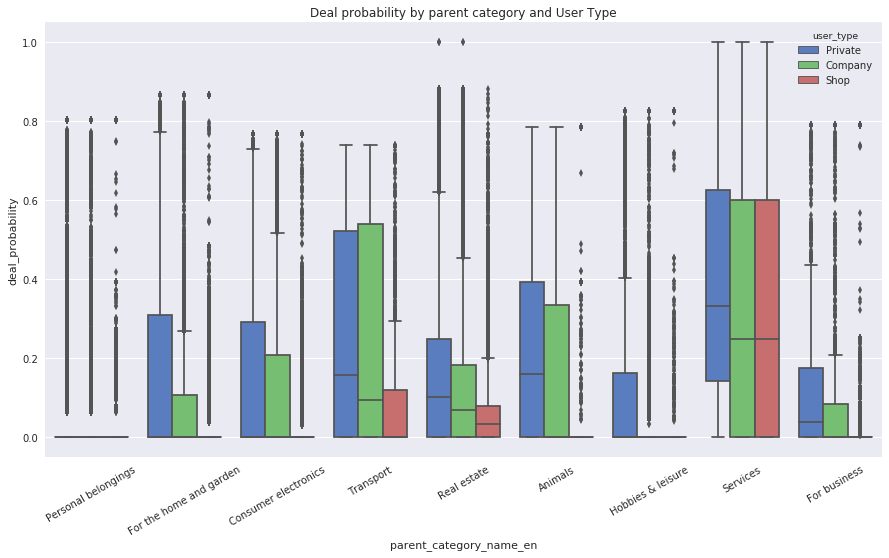

In [21]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x="parent_category_name_en", y="deal_probability", hue="user_type",  palette="muted", data=train_dp)
plt.title("Deal probability by parent category and User Type")
plt.xticks(rotation=30)
plt.show()

In [22]:
train_dp.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Volgograd oblast,Transport,Cars


# Deal with NA

#### 1. Price
rescale the price by log and fill na with parent_categorical median


In [23]:
for df in full_dp:
    df['price'] = np.log(df['price']+0.001)

In [24]:
catagorical_meanPrice = train_dp.groupby('parent_category_name_en')['price'].mean()
catagorical_meanPrice

parent_category_name_en
Animals                     6.271445
Consumer electronics        7.770902
For business                9.846548
For the home and garden     7.401637
Hobbies & leisure           7.222379
Personal belongings         6.613014
Real estate                13.185055
Services                    5.847204
Transport                  12.149855
Name: price, dtype: float64

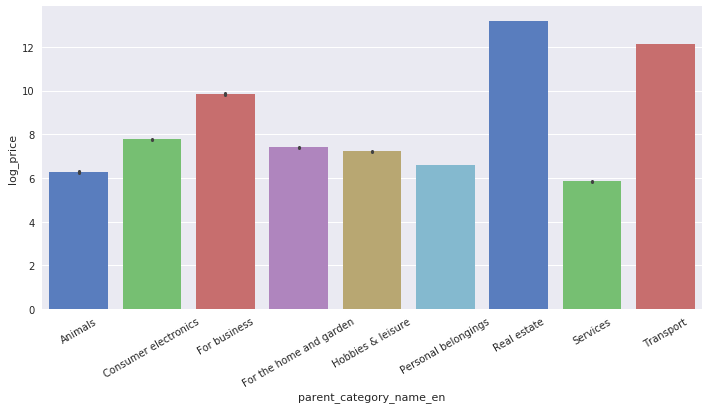

In [25]:
g = sns.factorplot(x="parent_category_name_en",y="price",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted", order =catagorical_meanPrice.index.tolist())
g.despine(left=True)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("log_price")

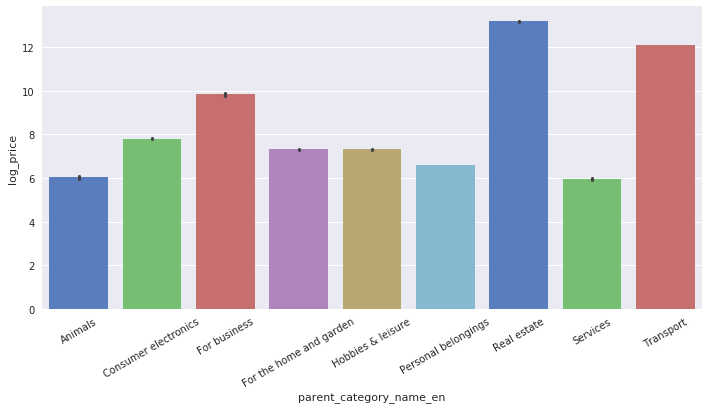

In [26]:
g = sns.factorplot(x="parent_category_name_en",y="price",data=test_dp,kind="bar", size = 5, aspect=2,
palette = "muted",order =catagorical_meanPrice.index.tolist())
g.despine(left=True)
g.set_xticklabels(rotation=30)
g = g.set_ylabels("log_price")

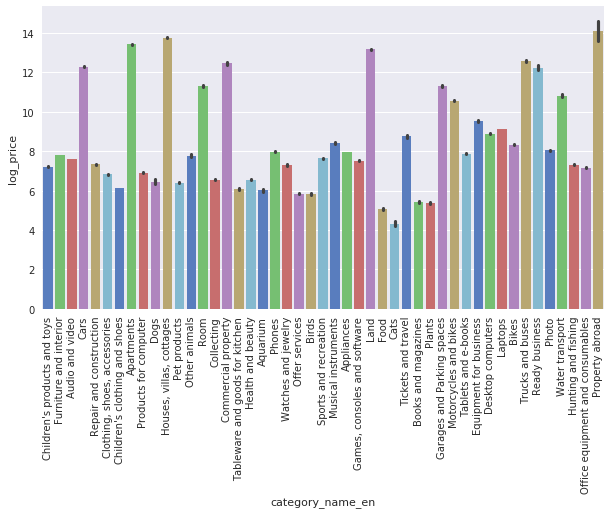

In [27]:
g = sns.factorplot(x="category_name_en",y="price",data=train_dp,kind="bar", size = 5, aspect=2,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("log_price")

In [28]:
catagorical_meanPrice = train_dp.groupby('parent_category_name_en')['price'].mean()
catagorical_meanPrice

parent_category_name_en
Animals                     6.271445
Consumer electronics        7.770902
For business                9.846548
For the home and garden     7.401637
Hobbies & leisure           7.222379
Personal belongings         6.613014
Real estate                13.185055
Services                    5.847204
Transport                  12.149855
Name: price, dtype: float64

In [29]:
catagorical_meanPrice = test_dp.groupby('parent_category_name_en')['price'].mean()
catagorical_meanPrice

parent_category_name_en
Animals                     6.039699
Consumer electronics        7.804351
For business                9.839813
For the home and garden     7.311656
Hobbies & leisure           7.314393
Personal belongings         6.608101
Real estate                13.184556
Services                    5.964760
Transport                  12.093705
Name: price, dtype: float64

In [30]:
def impute_median(series):
    return series.fillna(series.median())

In [31]:
for df in full_dp:
    by_category = df.groupby('parent_category_name_en')
    df.price = by_category.price.transform(impute_median)

### 2.  Image_top1

In [32]:
for df in full_dp:
    df["image_top_1"].fillna(-999,inplace=True)

# Create new features

Get activation weekdays from activation_date

In [33]:
for df in full_dp:
    df["Weekday"] = df['activation_date'].dt.weekday

In [34]:
by_weekday = train_dp.groupby('Weekday')

In [35]:
by_weekday['deal_probability'].mean()

Weekday
0    0.137005
1    0.138980
2    0.139684
3    0.139229
4    0.140545
5    0.140856
6    0.138110
Name: deal_probability, dtype: float64

Tile and description words

In [36]:
for df in full_dp:
    df["title_nwords"] = df["title"].apply(lambda x: len(x.split()))
    
    df["description"].fillna("missing", inplace=True)
    df["desc_nwords"] = df["description"].apply(lambda x: len(x.split()))


In [37]:
train_dp.groupby('title_nwords')['deal_probability'].mean()

title_nwords
1     0.110049
2     0.136253
3     0.161111
4     0.146465
5     0.136256
6     0.142637
7     0.129853
8     0.122524
9     0.115717
10    0.120365
11    0.130552
12    0.186087
13    0.127960
14    0.050431
15    0.000000
16    0.000000
21    0.166670
Name: deal_probability, dtype: float64

In [38]:
train_dp.groupby('title_nwords')['deal_probability'].count()

title_nwords
1     235219
2     360736
3     335489
4     206671
5     122982
6     143321
7      70964
8      18283
9       6752
10      2283
11       517
12       170
13        27
14         7
15         1
16         1
21         1
Name: deal_probability, dtype: int64

In [39]:
train_dp.groupby('desc_nwords')['deal_probability'].mean()

desc_nwords
1      0.080511
2      0.115235
3      0.120946
4      0.128381
5      0.129993
6      0.132171
7      0.135731
8      0.136611
9      0.140386
10     0.142023
11     0.143233
12     0.144047
13     0.149174
14     0.148086
15     0.150587
16     0.155904
17     0.152177
18     0.157392
19     0.158023
20     0.163075
21     0.161475
22     0.161620
23     0.164674
24     0.164146
25     0.165452
26     0.164980
27     0.166666
28     0.166601
29     0.170549
30     0.171014
         ...   
546    0.000000
548    0.000000
549    0.000000
550    0.276290
551    0.000000
552    0.000000
554    0.000000
558    0.000000
560    0.000000
564    0.000000
566    0.000000
570    0.389250
573    0.000000
581    0.000000
585    0.000000
586    0.492770
592    0.000000
594    0.234490
597    0.273070
601    0.000000
607    0.000000
612    0.158780
617    0.308150
623    0.000000
629    0.246130
631    0.000000
647    0.000000
653    0.000000
661    0.000000
711    0.000000
Name: deal_p

In [40]:
train_dp.groupby('desc_nwords')['deal_probability'].count()

desc_nwords
1      134086
2       39401
3       53251
4       59228
5       64832
6       66341
7       65831
8       62604
9       58696
10      54663
11      50954
12      46716
13      42740
14      39456
15      36397
16      32911
17      30899
18      27969
19      25846
20      23932
21      22369
22      20381
23      18899
24      17592
25      16461
26      15607
27      14655
28      13501
29      12755
30      11813
        ...  
546         3
548         2
549         1
550         1
551         1
552         1
554         1
558         1
560         1
564         1
566         1
570         1
573         1
581         1
585         1
586         1
592         1
594         1
597         1
601         1
607         1
612         1
617         1
623         1
629         1
631         1
647         1
653         1
661         1
711         1
Name: deal_probability, Length: 546, dtype: int64

In [41]:
# Label Encoder
# https://www.kaggle.com/him4318/avito-lightgbm-with-ridge-feature-v-2-0/code
from sklearn import preprocessing

print("\nEncode Variables")
categorical = ["user_id","region","city","parent_category_name","category_name","user_type","image_top_1","param_1","param_2","param_3"]
print("Encoding :",categorical)

# Encoder:
lbl = preprocessing.LabelEncoder()
for col in categorical:
    df[col].fillna('Unknown')
    df[col] = lbl.fit_transform(df[col].astype(str))
    
print("\nText Features")


Encode Variables
Encoding : ['user_id', 'region', 'city', 'parent_category_name', 'category_name', 'user_type', 'image_top_1', 'param_1', 'param_2', 'param_3']

Text Features


In [42]:
df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,activation_date,user_type,image,image_top_1,region_en,parent_category_name_en,category_name_en,Weekday,title_nwords,desc_nwords
0,6544e41a8817,262938,4,306,4,10,108,177,62,Отдам бесплатно,...,2017-04-18,1,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,1137,Volgograd oblast,Personal belongings,Children's clothing and shoes,1,2,2
1,65b9484d670f,55145,19,933,8,5,117,92,928,Продам велосипед,...,2017-04-16,1,NaN,0,Sverdlovsk oblast,Hobbies & leisure,Bikes,6,2,10
2,8bab230b2ecd,13649,12,147,0,2,310,92,928,BBK,...,2017-04-17,1,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2169,Novosibirsk oblast,Consumer electronics,Audio and video,0,1,21
3,8e348601fefc,113959,18,1238,2,4,106,111,928,Вытяжка Jetair 60,...,2017-04-17,1,NaN,0,Saratov oblast,For the home and garden,Appliances,0,3,12
4,8bd2fe400b89,42880,14,236,4,42,100,92,928,Коляска зима-лето,...,2017-04-15,1,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,7,Orenburg oblast,Personal belongings,Children's products and toys,5,2,10


### Try to see if user post numbers will affect the deal probability

In [43]:
# combine use_id in train and test dataset into a list
train_pool = train_dp['user_id'].tolist()
test_pool = test_dp['user_id'].tolist()
user_pool = train_pool + test_pool 

In [44]:
len(list(set(user_pool)))

1077838

In [45]:
unique, counts = np.unique(user_pool, return_counts=True)

In [46]:
np.unique(counts,return_counts=True)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  115,  117,  118,  119,  120,  121,  122,  123,
         124,  125,  126,  128,  129,  130,  131,  132,  133,  136,  139,
         140,  141,  143,  144,  145,  146,  147,  148,  149,  151,  153,
         155,  158,  159,  160,  163, 

The most experienced people post 1080.

In [47]:
user_map = {key:val for (key,val) in zip(unique,counts)}

In [48]:
for df in full_dp:
    df['user_post_num'] = df['user_id'].apply(lambda x: user_map[str(x)] if user_map[str(x)]<9 else 10)

In [49]:
train_dp.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,image,image_top_1,deal_probability,region_en,parent_category_name_en,category_name_en,Weekday,title_nwords,desc_nwords,user_post_num
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Sverdlovsk oblast,Personal belongings,Children's products and toys,1,3,7,1
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,Samara oblast,For the home and garden,Furniture and interior,6,3,7,1
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Rostov oblast,Consumer electronics,Audio and video,0,2,17,2
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Tatarstan,Personal belongings,Children's products and toys,5,1,3,1
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Volgograd oblast,Transport,Cars,3,3,4,1


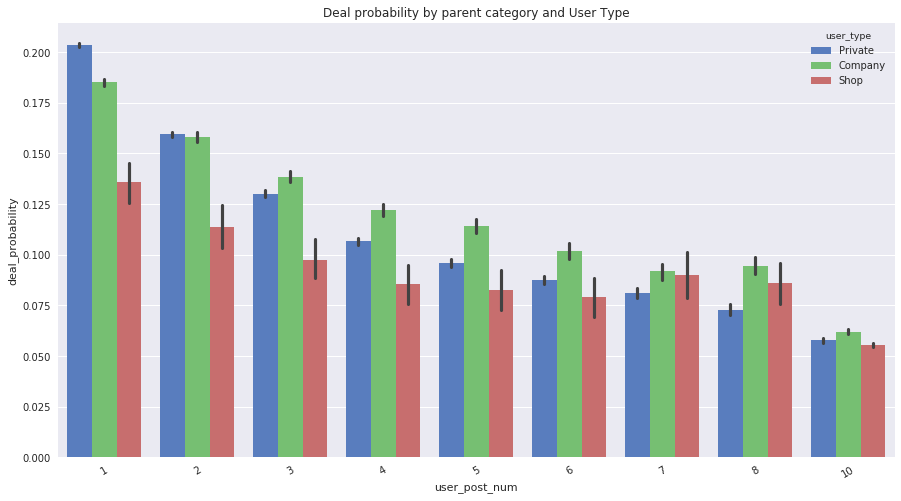

In [50]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.barplot(x="user_post_num", y="deal_probability", hue="user_type",  palette="muted", data=train_dp)
plt.title("Deal probability by parent category and User Type")
plt.xticks(rotation=30)
plt.show()

### Get the imaging features

In [51]:
import pickle
data_dir = "../input/"
train_feats_list = ['../input/feats_0.pkl',
 '../input/feats_1.pkl',
 '../input/feats_2.pkl',
 '../input/feats_3.pkl',
 '../input/feats_4.pkl']
train_feats = pd.DataFrame()
for pkl in train_feats_list:
    df = pd.read_pickle(pkl)
    train_feats = train_feats.append(df)
test_feats = pd.read_pickle('../input/feats_test_jpg.pkl')

In [52]:
train_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390836 entries, 0 to 278166
Data columns (total 11 columns):
apw          1390836 non-null float64
avg_blue     1390836 non-null float64
avg_green    1390836 non-null float64
avg_red      1390836 non-null float64
blurrness    1390836 non-null float64
dullness     1390836 non-null float64
height       1390836 non-null float64
image        1390836 non-null object
size         1390836 non-null float64
whiteness    1390836 non-null float64
width        1390836 non-null float64
dtypes: float64(10), object(1)
memory usage: 127.3+ MB


In [53]:
train_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 25 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1503424 non-null object
price                      1503424 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null datetime64[ns]
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1503424 non-null float64
deal_probabil

In [54]:
l1 = train_feats.image.tolist()
l2 = train_dp.image.tolist()

In [55]:
len(set(l1+l2))

2781673

In [56]:
l1

['0b8eed559572527d972b4d959e8f4c107fdd9bc19cca04903854ac315f74615e.jpg',
 '856e74b8c46edcf0c0e23444eab019bfda63687bb70a3481955cc6ab86e39df2.jpg',
 '122d198cf11ab32d2346bff455d6702f1ea519df957cea2625aa50842fe14ad1.jpg',
 '2809fd6afd6d3cae4dd4ad93a7f905a0db32292f4df4b3f19fa5492e08cbfd90.jpg',
 '5ef4a19afe4ad593464931734ff43c1112cf94c6bdb4593f3b754fee46739515.jpg',
 'c37787b5cc6c3052130c6f390aa5b57462b558a204d5c4124bc89447c9e1b4b0.jpg',
 '0f8ae17e177ed82363ed3dba7d277ed6227ac0c935cb52c17f02d638a92aef6e.jpg',
 'ba126be25858022d3cddf07d27288f9d35c495458ec49aa9820708379b7ffc1e.jpg',
 '4cc05cb70bcdde73e34718020f2ef4c69063af4098602bfed8a00e7f53a523ed.jpg',
 '28519dc39d1da01b36c544d31154f251cd6774f55599b78a52d7e1b7c0849846.jpg',
 '6511abdb5be3ea579bc0f03c899542818231e39d9d129501522b5c2a145430a2.jpg',
 'c5334864c3c26a9d38efa16d59be2ac66aea1b6a2c866eadc42ee88784f1c126.jpg',
 'd00f4c97e6787185a08ea6f096a88d636fdb1217d59a43757ce772e670fc610c.jpg',
 '69e668d2d07cbcc5b8be6ddf6a8708c9c54e04d4eb1ff5883

In [57]:
l2

['d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19',
 '79c9392cc51a9c81c6eb91eceb8e552171db39d71427001e1e0859c0fb843a31',
 'b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a8713f112c67e29bb42',
 'e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c841302bf49820803501b4b',
 '54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2c089d8376e883ed33b',
 'eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99c52a6117994dd44690',
 '0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a9801ec9e6ee9d20ad2c6',
 '9bab29a519e81c14f4582024adfebd4f11a4ac71d323a62f7731e19db9702115',
 '75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05326eb44166d47a8aed',
 '54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3e3636587c101e10301',
 '645d3fb949cb116a00c596ca1e168d8c5ddd21cdeacc5a26b711e3921a06f536',
 '5162fdb7d8427738370d3145647d2726546f65631e5de974f5317e19fc0c1673',
 '5ba63fecb66633cde074c661e0249e26af5cf370241e135ac3c7486dcab2f38e',
 '0c84cef077d10e5bb37af78049fb0a593c9f1c7f37f458359b893f0775592583',
 '09ebf4b30bad5857a1f26cd18d907c1e

In [58]:
train_feats.image.apply(lambda x: x.split('.')[0]).tolist()

['0b8eed559572527d972b4d959e8f4c107fdd9bc19cca04903854ac315f74615e',
 '856e74b8c46edcf0c0e23444eab019bfda63687bb70a3481955cc6ab86e39df2',
 '122d198cf11ab32d2346bff455d6702f1ea519df957cea2625aa50842fe14ad1',
 '2809fd6afd6d3cae4dd4ad93a7f905a0db32292f4df4b3f19fa5492e08cbfd90',
 '5ef4a19afe4ad593464931734ff43c1112cf94c6bdb4593f3b754fee46739515',
 'c37787b5cc6c3052130c6f390aa5b57462b558a204d5c4124bc89447c9e1b4b0',
 '0f8ae17e177ed82363ed3dba7d277ed6227ac0c935cb52c17f02d638a92aef6e',
 'ba126be25858022d3cddf07d27288f9d35c495458ec49aa9820708379b7ffc1e',
 '4cc05cb70bcdde73e34718020f2ef4c69063af4098602bfed8a00e7f53a523ed',
 '28519dc39d1da01b36c544d31154f251cd6774f55599b78a52d7e1b7c0849846',
 '6511abdb5be3ea579bc0f03c899542818231e39d9d129501522b5c2a145430a2',
 'c5334864c3c26a9d38efa16d59be2ac66aea1b6a2c866eadc42ee88784f1c126',
 'd00f4c97e6787185a08ea6f096a88d636fdb1217d59a43757ce772e670fc610c',
 '69e668d2d07cbcc5b8be6ddf6a8708c9c54e04d4eb1ff5883899bc0317a281ad',
 '78b852efa7251401c14695fc2a3daa62

In [59]:
train_feats.image = train_feats.image.apply(lambda x: x.split('.')[0])

In [60]:
train_dp = pd.merge(train_dp, train_feats,how='outer', on='image')

In [61]:
train_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503424 entries, 0 to 1503423
Data columns (total 35 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1503424 non-null object
price                      1503424 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null datetime64[ns]
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1503424 non-null float64
deal_probabil

In [62]:
train_feats.columns.tolist()

['apw',
 'avg_blue',
 'avg_green',
 'avg_red',
 'blurrness',
 'dullness',
 'height',
 'image',
 'size',
 'whiteness',
 'width']

In [63]:
colormap=plt.cm.RdBu

In [64]:
train_dp[['apw',
 'avg_blue',
 'avg_green',
 'avg_red',
 'blurrness',
 'dullness',
 'height',
 'size',
 'whiteness',
 'width']].fillna('0')

,apw,avg_blue,avg_green,avg_red,blurrness,dullness,height,size,whiteness,width
0,2.32949,0.360951,0.320277,0.612833,406.961,0,480,27039,1.965,358
1,3.27373,0.297394,0.366578,0.422213,1018.93,6.335,480,30385,0,360
2,2.64952,0.703338,0.703571,0.703576,493.908,0,360,18681,72.02,392
3,1.54784,0.851711,0.846464,0.846093,377.266,0,360,13656,94.325,360
4,2.46962,0.449327,0.512993,0.485592,557.62,7.715,360,36710,1.32,640
5,3.41667,0.29801,0.384584,0.48915,756.665,5.965,480,28724,5.025,360
6,2.04167,0.302317,0.334786,0.331637,218.179,41.2,360,39227,13.96,480
7,1.81192,0.596218,0.590831,0.603627,2342.11,0,480,74268,0,360
8,2.1088,0.405144,0.418684,0.393828,888.838,0,480,48703,0,360
9,1.57176,0.546028,0.554825,0.613156,497.689,0,480,31211,0,270


In [65]:
train_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503424 entries, 0 to 1503423
Data columns (total 35 columns):
item_id                    1503424 non-null object
user_id                    1503424 non-null object
region                     1503424 non-null object
city                       1503424 non-null object
parent_category_name       1503424 non-null object
category_name              1503424 non-null object
param_1                    1441848 non-null object
param_2                    848882 non-null object
param_3                    640859 non-null object
title                      1503424 non-null object
description                1503424 non-null object
price                      1503424 non-null float64
item_seq_number            1503424 non-null int64
activation_date            1503424 non-null datetime64[ns]
user_type                  1503424 non-null object
image                      1390836 non-null object
image_top_1                1503424 non-null float64
deal_probabil

In [66]:
dp = train_dp

In [67]:
train_dp.fillna({'apw':0,
 'avg_blue':0,
 'avg_green':0,
 'avg_red':0,
 'blurrness':100,
 'dullness':100,
 'height':0,
 'size':0,
 'whiteness':0,
 'width':0},inplace=True)

In [68]:
corr_feats = train_dp[['apw',
 'avg_blue',
 'avg_green',
 'avg_red',
 'blurrness',
 'dullness',
 'height',
 'size',
 'whiteness',
 'width','deal_probability']]

In [69]:
rescale_feats = [
 'blurrness',
 'dullness',
 'height',
 'size',
 'whiteness',
 'width']
for i in rescale_feats:
    train_feats[i] = train_feats[i].apply(lambda x: np.log(x+1))

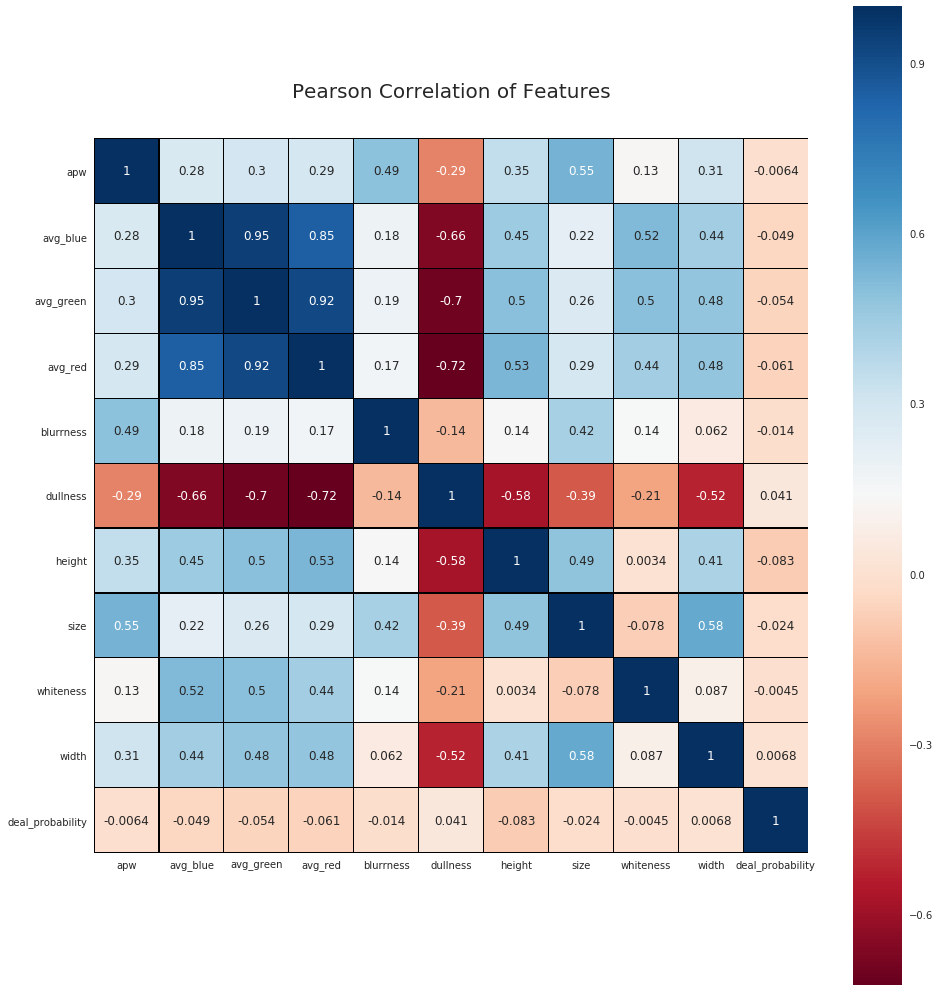

In [70]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,18))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(corr_feats.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='Black', annot=True)